Specify inputs only in the cell below.

In [1]:
export_file_path = 'data/goodreads_library_export.csv'

Do not change anything except for in the cell above unless you're changing functionality.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = [15, 3]

In [4]:
df = pd.read_csv(
    export_file_path,
    usecols=[
        'My Rating',
        'Average Rating',
        'Number of Pages',
        'Read Count'
    ]
)

df.rename(columns={'Average Rating': 'Community Rating'}, inplace=True)

df['Number of Pages'] = df['Number of Pages'].fillna(0)
df['Number of Pages'] = df['Number of Pages'].astype('int64')

df = df[df['Read Count'] > 0]
df.drop(axis=1, columns=['Read Count'], inplace=True)

print('Dataset loaded and prepared.')

Dataset loaded and prepared.


In [5]:
print(f'Total pages read: {df["Number of Pages"].sum()}')

Total pages read: 57931


In [6]:
comm_ratings_np = df[["Community Rating"]].to_numpy().squeeze()
my_ratings_np = df[["My Rating"]].to_numpy().squeeze()

print(f'Overall my average ratings:        {round(my_ratings_np.mean(), 2)}')
print(f'Overall community average ratings: {round(comm_ratings_np.mean(), 2)}')
print(f'Correlation:                       {round(np.corrcoef(comm_ratings_np, my_ratings_np)[0][1], 2)}')

Overall my average ratings:        3.54
Overall community average ratings: 4.04
Correlation:                       0.4


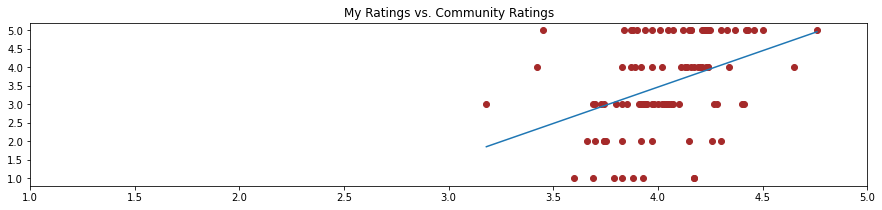

In [7]:
ticks = [i/2 for i in range(2, 11)]

fig, ax = plt.subplots()
ax.scatter(comm_ratings_np, my_ratings_np, color='brown')

# Credit: https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python
ax.plot(np.unique(comm_ratings_np), np.poly1d(np.polyfit(comm_ratings_np, my_ratings_np, 1))(np.unique(comm_ratings_np)))

ax.set_xticks(ticks=ticks)
ax.set_yticks(ticks=ticks)
ax.title.set_text('My Ratings vs. Community Ratings')